# Backtesting of predctions

## Author: Danilo Filippo Reiszel Pereira
Univesidade Federal do Rio de Janeiro

This notebook contains a simulation of trades made based on the predictions performed by several different models

In [1]:
from __future__ import print_function, division
import sys, os
sys.path.append('../../src')
import time 
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from neuralstocks.backtesting import *
from neuralstocks.utils import *

%matplotlib inline

# Global Params
Setting global params and useful variables, such as directories and image styling

In [2]:
saveFigDir = '/home/danilofrp/projeto_final/ns-results/backtesting'
if not os.path.exists(saveFigDir): os.makedirs(saveFigDir)

pathABEV3_MLP = '../../../ns-results/data/predicted/MLP/diario/ABEV3/ABEV3_predicted_MLP.CSV'
pathBRFS3_MLP = '../../../ns-results/data/predicted/MLP/diario/BRFS3/BRFS3_predicted_MLP.CSV'
pathBVMF3_MLP = '../../../ns-results/data/predicted/MLP/diario/BVMF3/BVMF3_predicted_MLP.CSV'
pathCCRO3_MLP = '../../../ns-results/data/predicted/MLP/diario/CCRO3/CCRO3_predicted_MLP.CSV'
pathELET3_MLP = '../../../ns-results/data/predicted/MLP/diario/ELET3/ELET3_predicted_MLP.CSV'
pathITUB4_MLP = '../../../ns-results/data/predicted/MLP/diario/ITUB4/ITUB4_predicted_MLP.CSV'
pathKROT3_MLP = '../../../ns-results/data/predicted/MLP/diario/KROT3/KROT3_predicted_MLP.CSV'
pathLAME4_MLP = '../../../ns-results/data/predicted/MLP/diario/LAME4/LAME4_predicted_MLP.CSV'
pathPETR4_MLP = '../../../ns-results/data/predicted/MLP/diario/PETR4/PETR4_predicted_MLP.CSV'
pathSUZB5_MLP = '../../../ns-results/data/predicted/MLP/diario/SUZB5/SUZB5_predicted_MLP.CSV'
pathUSIM5_MLP = '../../../ns-results/data/predicted/MLP/diario/USIM5/USIM5_predicted_MLP.CSV'
pathVALE5_MLP = '../../../ns-results/data/predicted/MLP/diario/VALE5/VALE5_predicted_MLP.CSV'
pathVIVT4_MLP = '../../../ns-results/data/predicted/MLP/diario/VIVT4/VIVT4_predicted_MLP.CSV'

pathABEV3_SAE = '../../../ns-results/data/predicted/SAE/diario/ABEV3/ABEV3_predicted_SAE.CSV'
pathBRFS3_SAE = '../../../ns-results/data/predicted/SAE/diario/BRFS3/BRFS3_predicted_SAE.CSV'
pathBVMF3_SAE = '../../../ns-results/data/predicted/SAE/diario/BVMF3/BVMF3_predicted_SAE.CSV'
pathCCRO3_SAE = '../../../ns-results/data/predicted/SAE/diario/CCRO3/CCRO3_predicted_SAE.CSV'
pathELET3_SAE = '../../../ns-results/data/predicted/SAE/diario/ELET3/ELET3_predicted_SAE.CSV'
pathITUB4_SAE = '../../../ns-results/data/predicted/SAE/diario/ITUB4/ITUB4_predicted_SAE.CSV'
pathKROT3_SAE = '../../../ns-results/data/predicted/SAE/diario/KROT3/KROT3_predicted_SAE.CSV'
pathLAME4_SAE = '../../../ns-results/data/predicted/SAE/diario/LAME4/LAME4_predicted_SAE.CSV'
pathPETR4_SAE = '../../../ns-results/data/predicted/SAE/diario/PETR4/PETR4_predicted_SAE.CSV'
pathSUZB5_SAE = '../../../ns-results/data/predicted/SAE/diario/SUZB5/SUZB5_predicted_SAE.CSV'
pathUSIM5_SAE = '../../../ns-results/data/predicted/SAE/diario/USIM5/USIM5_predicted_SAE.CSV'
pathVALE5_SAE = '../../../ns-results/data/predicted/SAE/diario/VALE5/VALE5_predicted_SAE.CSV'
pathVIVT4_SAE = '../../../ns-results/data/predicted/SAE/diario/VIVT4/VIVT4_predicted_SAE.CSV'

pathABEV3_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/ABEV3/ABEV3_bin_predicted_MLP.CSV'
pathBRFS3_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/BRFS3/BRFS3_bin_predicted_MLP.CSV'
pathBVMF3_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/BVMF3/BVMF3_bin_predicted_MLP.CSV'
pathCCRO3_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/CCRO3/CCRO3_bin_predicted_MLP.CSV'
pathELET3_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/ELET3/ELET3_bin_predicted_MLP.CSV'
pathITUB4_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/ITUB4/ITUB4_bin_predicted_MLP.CSV'
pathKROT3_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/KROT3/KROT3_bin_predicted_MLP.CSV'
pathLAME4_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/LAME4/LAME4_bin_predicted_MLP.CSV'
pathPETR4_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/PETR4/PETR4_bin_predicted_MLP.CSV'
pathSUZB5_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/SUZB5/SUZB5_bin_predicted_MLP.CSV'
pathUSIM5_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/USIM5/USIM5_bin_predicted_MLP.CSV'
pathVALE5_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/VALE5/VALE5_bin_predicted_MLP.CSV'
pathVIVT4_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/VIVT4/VIVT4_bin_predicted_MLP.CSV'

pathABEV3_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/ABEV3/ABEV3_bin_predicted_SAE.CSV'
pathBRFS3_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/BRFS3/BRFS3_bin_predicted_SAE.CSV'
pathBVMF3_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/BVMF3/BVMF3_bin_predicted_SAE.CSV'
pathCCRO3_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/CCRO3/CCRO3_bin_predicted_SAE.CSV'
pathELET3_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/ELET3/ELET3_bin_predicted_SAE.CSV'
pathITUB4_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/ITUB4/ITUB4_bin_predicted_SAE.CSV'
pathKROT3_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/KROT3/KROT3_bin_predicted_SAE.CSV'
pathLAME4_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/LAME4/LAME4_bin_predicted_SAE.CSV'
pathPETR4_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/PETR4/PETR4_bin_predicted_SAE.CSV'
pathSUZB5_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/SUZB5/SUZB5_bin_predicted_SAE.CSV'
pathUSIM5_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/USIM5/USIM5_bin_predicted_SAE.CSV'
pathVALE5_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/VALE5/VALE5_bin_predicted_SAE.CSV'
pathVIVT4_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/VIVT4/VIVT4_bin_predicted_SAE.CSV'


plt.rcParams['font.weight'] = 'bold'
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

## Data Acquisition

In [3]:
init_time = time.time()

ABEV3_MLP = pd.read_csv(pathABEV3_MLP, parse_dates=['Date'], index_col='Date').sort_index()
BRFS3_MLP = pd.read_csv(pathBRFS3_MLP, parse_dates=['Date'], index_col='Date').sort_index()
BVMF3_MLP = pd.read_csv(pathBVMF3_MLP, parse_dates=['Date'], index_col='Date').sort_index()
CCRO3_MLP = pd.read_csv(pathCCRO3_MLP, parse_dates=['Date'], index_col='Date').sort_index()
ELET3_MLP = pd.read_csv(pathELET3_MLP, parse_dates=['Date'], index_col='Date').sort_index()
ITUB4_MLP = pd.read_csv(pathITUB4_MLP, parse_dates=['Date'], index_col='Date').sort_index()
KROT3_MLP = pd.read_csv(pathKROT3_MLP, parse_dates=['Date'], index_col='Date').sort_index()
LAME4_MLP = pd.read_csv(pathLAME4_MLP, parse_dates=['Date'], index_col='Date').sort_index()
PETR4_MLP = pd.read_csv(pathPETR4_MLP, parse_dates=['Date'], index_col='Date').sort_index()
SUZB5_MLP = pd.read_csv(pathSUZB5_MLP, parse_dates=['Date'], index_col='Date').sort_index()
USIM5_MLP = pd.read_csv(pathUSIM5_MLP, parse_dates=['Date'], index_col='Date').sort_index()
VALE5_MLP = pd.read_csv(pathVALE5_MLP, parse_dates=['Date'], index_col='Date').sort_index()
VIVT4_MLP = pd.read_csv(pathVIVT4_MLP, parse_dates=['Date'], index_col='Date').sort_index()

ABEV3_SAE = pd.read_csv(pathABEV3_SAE, parse_dates=['Date'], index_col='Date')[['ABEV3_resid_predicted_SAE_mapminmax', 'ABEV3_Close_predicted_SAE_mapminmax', 'ABEV3_resid_predicted_SAE_mapstd', 'ABEV3_Close_predicted_SAE_mapstd']].sort_index()
BRFS3_SAE = pd.read_csv(pathBRFS3_SAE, parse_dates=['Date'], index_col='Date')[['BRFS3_resid_predicted_SAE_mapminmax', 'BRFS3_Close_predicted_SAE_mapminmax', 'BRFS3_resid_predicted_SAE_mapstd', 'BRFS3_Close_predicted_SAE_mapstd']].sort_index()
BVMF3_SAE = pd.read_csv(pathBVMF3_SAE, parse_dates=['Date'], index_col='Date')[['BVMF3_resid_predicted_SAE_mapminmax', 'BVMF3_Close_predicted_SAE_mapminmax', 'BVMF3_resid_predicted_SAE_mapstd', 'BVMF3_Close_predicted_SAE_mapstd']].sort_index()
CCRO3_SAE = pd.read_csv(pathCCRO3_SAE, parse_dates=['Date'], index_col='Date')[['CCRO3_resid_predicted_SAE_mapminmax', 'CCRO3_Close_predicted_SAE_mapminmax', 'CCRO3_resid_predicted_SAE_mapstd', 'CCRO3_Close_predicted_SAE_mapstd']].sort_index()
ELET3_SAE = pd.read_csv(pathELET3_SAE, parse_dates=['Date'], index_col='Date')[['ELET3_resid_predicted_SAE_mapminmax', 'ELET3_Close_predicted_SAE_mapminmax', 'ELET3_resid_predicted_SAE_mapstd', 'ELET3_Close_predicted_SAE_mapstd']].sort_index()
ITUB4_SAE = pd.read_csv(pathITUB4_SAE, parse_dates=['Date'], index_col='Date')[['ITUB4_resid_predicted_SAE_mapminmax', 'ITUB4_Close_predicted_SAE_mapminmax', 'ITUB4_resid_predicted_SAE_mapstd', 'ITUB4_Close_predicted_SAE_mapstd']].sort_index()
KROT3_SAE = pd.read_csv(pathKROT3_SAE, parse_dates=['Date'], index_col='Date')[['KROT3_resid_predicted_SAE_mapminmax', 'KROT3_Close_predicted_SAE_mapminmax', 'KROT3_resid_predicted_SAE_mapstd', 'KROT3_Close_predicted_SAE_mapstd']].sort_index()
LAME4_SAE = pd.read_csv(pathLAME4_SAE, parse_dates=['Date'], index_col='Date')[['LAME4_resid_predicted_SAE_mapminmax', 'LAME4_Close_predicted_SAE_mapminmax', 'LAME4_resid_predicted_SAE_mapstd', 'LAME4_Close_predicted_SAE_mapstd']].sort_index()
PETR4_SAE = pd.read_csv(pathPETR4_SAE, parse_dates=['Date'], index_col='Date')[['PETR4_resid_predicted_SAE_mapminmax', 'PETR4_Close_predicted_SAE_mapminmax', 'PETR4_resid_predicted_SAE_mapstd', 'PETR4_Close_predicted_SAE_mapstd']].sort_index()
SUZB5_SAE = pd.read_csv(pathSUZB5_SAE, parse_dates=['Date'], index_col='Date')[['SUZB5_resid_predicted_SAE_mapminmax', 'SUZB5_Close_predicted_SAE_mapminmax', 'SUZB5_resid_predicted_SAE_mapstd', 'SUZB5_Close_predicted_SAE_mapstd']].sort_index()
USIM5_SAE = pd.read_csv(pathUSIM5_SAE, parse_dates=['Date'], index_col='Date')[['USIM5_resid_predicted_SAE_mapminmax', 'USIM5_Close_predicted_SAE_mapminmax', 'USIM5_resid_predicted_SAE_mapstd', 'USIM5_Close_predicted_SAE_mapstd']].sort_index()
VALE5_SAE = pd.read_csv(pathVALE5_SAE, parse_dates=['Date'], index_col='Date')[['VALE5_resid_predicted_SAE_mapminmax', 'VALE5_Close_predicted_SAE_mapminmax', 'VALE5_resid_predicted_SAE_mapstd', 'VALE5_Close_predicted_SAE_mapstd']].sort_index()
VIVT4_SAE = pd.read_csv(pathVIVT4_SAE, parse_dates=['Date'], index_col='Date')[['VIVT4_resid_predicted_SAE_mapminmax', 'VIVT4_Close_predicted_SAE_mapminmax', 'VIVT4_resid_predicted_SAE_mapstd', 'VIVT4_Close_predicted_SAE_mapstd']].sort_index()

ABEV3_MLP_class = pd.read_csv(pathABEV3_MLP_class, parse_dates=['Date'], index_col='Date')[['ABEV3_bin_predicted_MLP_mapminmax', 'ABEV3_bin_predicted_MLP_mapstd', 'ABEV3_Close/Open_returns']].sort_index()
BRFS3_MLP_class = pd.read_csv(pathBRFS3_MLP_class, parse_dates=['Date'], index_col='Date')[['BRFS3_bin_predicted_MLP_mapminmax', 'BRFS3_bin_predicted_MLP_mapstd', 'BRFS3_Close/Open_returns']].sort_index()
BVMF3_MLP_class = pd.read_csv(pathBVMF3_MLP_class, parse_dates=['Date'], index_col='Date')[['BVMF3_bin_predicted_MLP_mapminmax', 'BVMF3_bin_predicted_MLP_mapstd', 'BVMF3_Close/Open_returns']].sort_index()
CCRO3_MLP_class = pd.read_csv(pathCCRO3_MLP_class, parse_dates=['Date'], index_col='Date')[['CCRO3_bin_predicted_MLP_mapminmax', 'CCRO3_bin_predicted_MLP_mapstd', 'CCRO3_Close/Open_returns']].sort_index()
ELET3_MLP_class = pd.read_csv(pathELET3_MLP_class, parse_dates=['Date'], index_col='Date')[['ELET3_bin_predicted_MLP_mapminmax', 'ELET3_bin_predicted_MLP_mapstd', 'ELET3_Close/Open_returns']].sort_index()
ITUB4_MLP_class = pd.read_csv(pathITUB4_MLP_class, parse_dates=['Date'], index_col='Date')[['ITUB4_bin_predicted_MLP_mapminmax', 'ITUB4_bin_predicted_MLP_mapstd', 'ITUB4_Close/Open_returns']].sort_index()
KROT3_MLP_class = pd.read_csv(pathKROT3_MLP_class, parse_dates=['Date'], index_col='Date')[['KROT3_bin_predicted_MLP_mapminmax', 'KROT3_bin_predicted_MLP_mapstd', 'KROT3_Close/Open_returns']].sort_index()
LAME4_MLP_class = pd.read_csv(pathLAME4_MLP_class, parse_dates=['Date'], index_col='Date')[['LAME4_bin_predicted_MLP_mapminmax', 'LAME4_bin_predicted_MLP_mapstd', 'LAME4_Close/Open_returns']].sort_index()
PETR4_MLP_class = pd.read_csv(pathPETR4_MLP_class, parse_dates=['Date'], index_col='Date')[['PETR4_bin_predicted_MLP_mapminmax', 'PETR4_bin_predicted_MLP_mapstd', 'PETR4_Close/Open_returns']].sort_index()
SUZB5_MLP_class = pd.read_csv(pathSUZB5_MLP_class, parse_dates=['Date'], index_col='Date')[['SUZB5_bin_predicted_MLP_mapminmax', 'SUZB5_bin_predicted_MLP_mapstd', 'SUZB5_Close/Open_returns']].sort_index()
USIM5_MLP_class = pd.read_csv(pathUSIM5_MLP_class, parse_dates=['Date'], index_col='Date')[['USIM5_bin_predicted_MLP_mapminmax', 'USIM5_bin_predicted_MLP_mapstd', 'USIM5_Close/Open_returns']].sort_index()
VALE5_MLP_class = pd.read_csv(pathVALE5_MLP_class, parse_dates=['Date'], index_col='Date')[['VALE5_bin_predicted_MLP_mapminmax', 'VALE5_bin_predicted_MLP_mapstd', 'VALE5_Close/Open_returns']].sort_index()
VIVT4_MLP_class = pd.read_csv(pathVIVT4_MLP_class, parse_dates=['Date'], index_col='Date')[['VIVT4_bin_predicted_MLP_mapminmax', 'VIVT4_bin_predicted_MLP_mapstd', 'VIVT4_Close/Open_returns']].sort_index()

ABEV3_SAE_class = pd.read_csv(pathABEV3_SAE_class, parse_dates=['Date'], index_col='Date')[['ABEV3_bin_predicted_SAE_mapminmax', 'ABEV3_bin_predicted_SAE_mapstd']].sort_index()
BRFS3_SAE_class = pd.read_csv(pathBRFS3_SAE_class, parse_dates=['Date'], index_col='Date')[['BRFS3_bin_predicted_SAE_mapminmax', 'BRFS3_bin_predicted_SAE_mapstd']].sort_index()
BVMF3_SAE_class = pd.read_csv(pathBVMF3_SAE_class, parse_dates=['Date'], index_col='Date')[['BVMF3_bin_predicted_SAE_mapminmax', 'BVMF3_bin_predicted_SAE_mapstd']].sort_index()
CCRO3_SAE_class = pd.read_csv(pathCCRO3_SAE_class, parse_dates=['Date'], index_col='Date')[['CCRO3_bin_predicted_SAE_mapminmax', 'CCRO3_bin_predicted_SAE_mapstd']].sort_index()
ELET3_SAE_class = pd.read_csv(pathELET3_SAE_class, parse_dates=['Date'], index_col='Date')[['ELET3_bin_predicted_SAE_mapminmax', 'ELET3_bin_predicted_SAE_mapstd']].sort_index()
ITUB4_SAE_class = pd.read_csv(pathITUB4_SAE_class, parse_dates=['Date'], index_col='Date')[['ITUB4_bin_predicted_SAE_mapminmax', 'ITUB4_bin_predicted_SAE_mapstd']].sort_index()
KROT3_SAE_class = pd.read_csv(pathKROT3_SAE_class, parse_dates=['Date'], index_col='Date')[['KROT3_bin_predicted_SAE_mapminmax', 'KROT3_bin_predicted_SAE_mapstd']].sort_index()
LAME4_SAE_class = pd.read_csv(pathLAME4_SAE_class, parse_dates=['Date'], index_col='Date')[['LAME4_bin_predicted_SAE_mapminmax', 'LAME4_bin_predicted_SAE_mapstd']].sort_index()
PETR4_SAE_class = pd.read_csv(pathPETR4_SAE_class, parse_dates=['Date'], index_col='Date')[['PETR4_bin_predicted_SAE_mapminmax', 'PETR4_bin_predicted_SAE_mapstd']].sort_index()
SUZB5_SAE_class = pd.read_csv(pathSUZB5_SAE_class, parse_dates=['Date'], index_col='Date')[['SUZB5_bin_predicted_SAE_mapminmax', 'SUZB5_bin_predicted_SAE_mapstd']].sort_index()
USIM5_SAE_class = pd.read_csv(pathUSIM5_SAE_class, parse_dates=['Date'], index_col='Date')[['USIM5_bin_predicted_SAE_mapminmax', 'USIM5_bin_predicted_SAE_mapstd']].sort_index()
VALE5_SAE_class = pd.read_csv(pathVALE5_SAE_class, parse_dates=['Date'], index_col='Date')[['VALE5_bin_predicted_SAE_mapminmax', 'VALE5_bin_predicted_SAE_mapstd']].sort_index()
VIVT4_SAE_class = pd.read_csv(pathVIVT4_SAE_class, parse_dates=['Date'], index_col='Date')[['VIVT4_bin_predicted_SAE_mapminmax', 'VIVT4_bin_predicted_SAE_mapstd']].sort_index()

ABEV3_MLP_class['ABEV3_bin_returns'] = np.sign(ABEV3_MLP_class['ABEV3_Close/Open_returns'])
BRFS3_MLP_class['BRFS3_bin_returns'] = np.sign(BRFS3_MLP_class['BRFS3_Close/Open_returns'])
BVMF3_MLP_class['BVMF3_bin_returns'] = np.sign(BVMF3_MLP_class['BVMF3_Close/Open_returns'])
CCRO3_MLP_class['CCRO3_bin_returns'] = np.sign(CCRO3_MLP_class['CCRO3_Close/Open_returns'])
ELET3_MLP_class['ELET3_bin_returns'] = np.sign(ELET3_MLP_class['ELET3_Close/Open_returns'])
ITUB4_MLP_class['ITUB4_bin_returns'] = np.sign(ITUB4_MLP_class['ITUB4_Close/Open_returns'])
KROT3_MLP_class['KROT3_bin_returns'] = np.sign(KROT3_MLP_class['KROT3_Close/Open_returns'])
LAME4_MLP_class['LAME4_bin_returns'] = np.sign(LAME4_MLP_class['LAME4_Close/Open_returns'])
PETR4_MLP_class['PETR4_bin_returns'] = np.sign(PETR4_MLP_class['PETR4_Close/Open_returns'])
SUZB5_MLP_class['SUZB5_bin_returns'] = np.sign(SUZB5_MLP_class['SUZB5_Close/Open_returns'])
USIM5_MLP_class['USIM5_bin_returns'] = np.sign(USIM5_MLP_class['USIM5_Close/Open_returns'])
VALE5_MLP_class['VALE5_bin_returns'] = np.sign(VALE5_MLP_class['VALE5_Close/Open_returns'])
VIVT4_MLP_class['VIVT4_bin_returns'] = np.sign(VIVT4_MLP_class['VIVT4_Close/Open_returns'])

df = pd.concat([ABEV3_MLP, ABEV3_SAE, ABEV3_MLP_class, ABEV3_SAE_class,
                BRFS3_MLP, BRFS3_SAE, BRFS3_MLP_class, BRFS3_SAE_class,
                BVMF3_MLP, BVMF3_SAE, BVMF3_MLP_class, BVMF3_SAE_class,
                CCRO3_MLP, CCRO3_SAE, CCRO3_MLP_class, CCRO3_SAE_class,
                ELET3_MLP, ELET3_SAE, ELET3_MLP_class, ELET3_SAE_class,
                ITUB4_MLP, ITUB4_SAE, ITUB4_MLP_class, ITUB4_SAE_class,
                KROT3_MLP, KROT3_SAE, KROT3_MLP_class, KROT3_SAE_class,
                LAME4_MLP, LAME4_SAE, LAME4_MLP_class, LAME4_SAE_class,
                PETR4_MLP, PETR4_SAE, PETR4_MLP_class, PETR4_SAE_class,
                SUZB5_MLP, SUZB5_SAE, SUZB5_MLP_class, SUZB5_SAE_class,
                USIM5_MLP, USIM5_SAE, USIM5_MLP_class, USIM5_SAE_class,
                VALE5_MLP, VALE5_SAE, VALE5_MLP_class, VALE5_SAE_class,
                VIVT4_MLP, VIVT4_SAE, VIVT4_MLP_class, VIVT4_SAE_class],
               axis = 1)

end_time = time.time()
print('Time to acquire data: '+str(end_time-init_time)+' seconds')

df.columns[:(len(df.columns)//13)]

Time to acquire data: 0.694509983063 seconds


Index([u'ABEV3_Close', u'ABEV3_Open', u'ABEV3_High', u'ABEV3_Low',
       u'ABEV3_Volume', u'ABEV3_Close_trend', u'ABEV3_Close_resid',
       u'ABEV3_resid_predicted_MLP_mapminmax',
       u'ABEV3_Close_predicted_MLP_mapminmax',
       u'ABEV3_resid_predicted_MLP_mapstd',
       u'ABEV3_Close_predicted_MLP_mapstd',
       u'ABEV3_resid_predicted_SAE_mapminmax',
       u'ABEV3_Close_predicted_SAE_mapminmax',
       u'ABEV3_resid_predicted_SAE_mapstd',
       u'ABEV3_Close_predicted_SAE_mapstd',
       u'ABEV3_bin_predicted_MLP_mapminmax', u'ABEV3_bin_predicted_MLP_mapstd',
       u'ABEV3_Close/Open_returns', u'ABEV3_bin_returns',
       u'ABEV3_bin_predicted_SAE_mapminmax',
       u'ABEV3_bin_predicted_SAE_mapstd'],
      dtype='object')

In [ ]:
p = ('2017', '2017')
print('PETR4 trend           prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_trend'][p[0]:p[1]]))))
print('PETR4 trend + ANNnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLP_mapminmax'][p[0]:p[1]]))))
print('PETR4 trend + ANNstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLP_mapstd'][p[0]:p[1]]))))
print('PETR4 trend + SAEnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_SAE_mapminmax'][p[0]:p[1]]))))
print('PETR4 trend + SAEstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_SAE_mapstd'][p[0]:p[1]]))))
print('----------------------------------------------')
print('PETR4 trend           prediction MAE:  {:.5f}'.format(mean_absolute_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_trend'][p[0]:p[1]])))
print('PETR4 trend + ANNnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('PETR4 trend + ANNstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('PETR4 trend + SAEnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('PETR4 trend + SAEstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('PETR4 trend           prediction R2s:  {:.5f}'.format(r2_score(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_trend'][p[0]:p[1]])))
print('PETR4 trend + ANNnorm prediction R2s:  {:.5f}'.format(r2_score(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('PETR4 trend + ANNstd  prediction R2s:  {:.5f}'.format(r2_score(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('PETR4 trend + SAEnorm prediction R2s:  {:.5f}'.format(r2_score(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('PETR4 trend + SAEstd  prediction R2s:  {:.5f}'.format(r2_score(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('PETR4 trend + ANNnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['PETR4_bin_returns'][p[0]:p[1]], df['PETR4_bin_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('PETR4 trend + ANNstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['PETR4_bin_returns'][p[0]:p[1]], df['PETR4_bin_predicted_MLP_mapstd'][p[0]:p[1]])))
print('PETR4 trend + SAEnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['PETR4_bin_returns'][p[0]:p[1]], df['PETR4_bin_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('PETR4 trend + SAEstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['PETR4_bin_returns'][p[0]:p[1]], df['PETR4_bin_predicted_SAE_mapstd'][p[0]:p[1]])))

In [ ]:
p = ('2017', '2017')
print('ITUB4 trend           prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_trend'][p[0]:p[1]]))))
print('ITUB4 trend + ANNnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLP_mapminmax'][p[0]:p[1]]))))
print('ITUB4 trend + ANNstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLP_mapstd'][p[0]:p[1]]))))
print('ITUB4 trend + SAEnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_SAE_mapminmax'][p[0]:p[1]]))))
print('ITUB4 trend + SAEstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_SAE_mapstd'][p[0]:p[1]]))))
print('----------------------------------------------')
print('ITUB4 trend           prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_trend'][p[0]:p[1]])))
print('ITUB4 trend + ANNnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('ITUB4 trend + ANNstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('ITUB4 trend + SAEnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('ITUB4 trend + SAEstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('ITUB4 trend           prediction R2s:  {:.5f}'.format(r2_score(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_trend'][p[0]:p[1]])))
print('ITUB4 trend + ANNnorm prediction R2s:  {:.5f}'.format(r2_score(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('ITUB4 trend + ANNstd  prediction R2s:  {:.5f}'.format(r2_score(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('ITUB4 trend + SAEnorm prediction R2s:  {:.5f}'.format(r2_score(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('ITUB4 trend + SAEstd  prediction R2s:  {:.5f}'.format(r2_score(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('ITUB4 trend + ANNnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['ITUB4_bin_returns'][p[0]:p[1]], df['ITUB4_bin_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('ITUB4 trend + ANNstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['ITUB4_bin_returns'][p[0]:p[1]], df['ITUB4_bin_predicted_MLP_mapstd'][p[0]:p[1]])))
print('ITUB4 trend + SAEnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['ITUB4_bin_returns'][p[0]:p[1]], df['ITUB4_bin_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('ITUB4 trend + SAEstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['ITUB4_bin_returns'][p[0]:p[1]], df['ITUB4_bin_predicted_SAE_mapstd'][p[0]:p[1]])))

In [ ]:
p = ('2017', '2017')
print('VALE5 trend           prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_trend'][p[0]:p[1]]))))
print('VALE5 trend + ANNnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLP_mapminmax'][p[0]:p[1]]))))
print('VALE5 trend + ANNstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLP_mapstd'][p[0]:p[1]]))))
print('VALE5 trend + SAEnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_SAE_mapminmax'][p[0]:p[1]]))))
print('VALE5 trend + SAEstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_SAE_mapstd'][p[0]:p[1]]))))
print('----------------------------------------------')
print('VALE5 trend           prediction MAE:  {:.5f}'.format(mean_absolute_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_trend'][p[0]:p[1]])))
print('VALE5 trend + ANNnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('VALE5 trend + ANNstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('VALE5 trend + SAEnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('VALE5 trend + SAEstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('VALE5 trend           prediction R2s:  {:.5f}'.format(r2_score(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_trend'][p[0]:p[1]])))
print('VALE5 trend + ANNnorm prediction R2s:  {:.5f}'.format(r2_score(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('VALE5 trend + ANNstd  prediction R2s:  {:.5f}'.format(r2_score(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('VALE5 trend + SAEnorm prediction R2s:  {:.5f}'.format(r2_score(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('VALE5 trend + SAEstd  prediction R2s:  {:.5f}'.format(r2_score(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('VALE5 trend + ANNnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['VALE5_bin_returns'][p[0]:p[1]], df['VALE5_bin_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('VALE5 trend + ANNstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['VALE5_bin_returns'][p[0]:p[1]], df['VALE5_bin_predicted_MLP_mapstd'][p[0]:p[1]])))
print('VALE5 trend + SAEnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['VALE5_bin_returns'][p[0]:p[1]], df['VALE5_bin_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('VALE5 trend + SAEstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['VALE5_bin_returns'][p[0]:p[1]], df['VALE5_bin_predicted_SAE_mapstd'][p[0]:p[1]])))

In [ ]:
p = ('2017', '2017')
print('SUZB5 trend           prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_trend'][p[0]:p[1]]))))
print('SUZB5 trend + ANNnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_MLP_mapminmax'][p[0]:p[1]]))))
print('SUZB5 trend + ANNstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_MLP_mapstd'][p[0]:p[1]]))))
print('SUZB5 trend + SAEnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_SAE_mapminmax'][p[0]:p[1]]))))
print('SUZB5 trend + SAEstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_SAE_mapstd'][p[0]:p[1]]))))
print('----------------------------------------------')
print('SUZB5 trend           prediction MAE:  {:.5f}'.format(mean_absolute_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_trend'][p[0]:p[1]])))
print('SUZB5 trend + ANNnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('SUZB5 trend + ANNstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('SUZB5 trend + SAEnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('SUZB5 trend + SAEstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('SUZB5 trend           prediction R2s:  {:.5f}'.format(r2_score(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_trend'][p[0]:p[1]])))
print('SUZB5 trend + ANNnorm prediction R2s:  {:.5f}'.format(r2_score(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('SUZB5 trend + ANNstd  prediction R2s:  {:.5f}'.format(r2_score(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('SUZB5 trend + SAEnorm prediction R2s:  {:.5f}'.format(r2_score(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('SUZB5 trend + SAEstd  prediction R2s:  {:.5f}'.format(r2_score(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('SUZB5 trend + ANNnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['SUZB5_bin_returns'][p[0]:p[1]], df['SUZB5_bin_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('SUZB5 trend + ANNstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['SUZB5_bin_returns'][p[0]:p[1]], df['SUZB5_bin_predicted_MLP_mapstd'][p[0]:p[1]])))
print('SUZB5 trend + SAEnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['SUZB5_bin_returns'][p[0]:p[1]], df['SUZB5_bin_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('SUZB5 trend + SAEstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['SUZB5_bin_returns'][p[0]:p[1]], df['SUZB5_bin_predicted_SAE_mapstd'][p[0]:p[1]])))

In [ ]:
p = ('2017', '2017')
print('ELET3 trend           prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_trend'][p[0]:p[1]]))))
print('ELET3 trend + ANNnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_MLP_mapminmax'][p[0]:p[1]]))))
print('ELET3 trend + ANNstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_MLP_mapstd'][p[0]:p[1]]))))
print('ELET3 trend + SAEnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_SAE_mapminmax'][p[0]:p[1]]))))
print('ELET3 trend + SAEstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_SAE_mapstd'][p[0]:p[1]]))))
print('----------------------------------------------')
print('ELET3 trend           prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_trend'][p[0]:p[1]])))
print('ELET3 trend + ANNnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('ELET3 trend + ANNstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('ELET3 trend + SAEnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('ELET3 trend + SAEstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('ELET3 trend           prediction R2s:  {:.5f}'.format(r2_score(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_trend'][p[0]:p[1]])))
print('ELET3 trend + ANNnorm prediction R2s:  {:.5f}'.format(r2_score(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('ELET3 trend + ANNstd  prediction R2s:  {:.5f}'.format(r2_score(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('ELET3 trend + SAEnorm prediction R2s:  {:.5f}'.format(r2_score(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('ELET3 trend + SAEstd  prediction R2s:  {:.5f}'.format(r2_score(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('ELET3 trend + ANNnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['ELET3_bin_returns'][p[0]:p[1]], df['ELET3_bin_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('ELET3 trend + ANNstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['ELET3_bin_returns'][p[0]:p[1]], df['ELET3_bin_predicted_MLP_mapstd'][p[0]:p[1]])))
print('ELET3 trend + SAEnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['ELET3_bin_returns'][p[0]:p[1]], df['ELET3_bin_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('ELET3 trend + SAEstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['ELET3_bin_returns'][p[0]:p[1]], df['ELET3_bin_predicted_SAE_mapstd'][p[0]:p[1]])))

In [ ]:
bt = Backtest(assets = ['ABEV3', 'BRFS3', 'BVMF3', 'CCRO3', 'ELET3', 'ITUB4', 'KROT3', 'LAME4', 'PETR4', 'SUZB5', 'USIM5', 'VALE5', 'VIVT4'], dataPath = '../../../data/stocks/[asset]/diario/[asset].CSV')

In [ ]:
initialFunds = 100000
startDate = '2017'
endDate = '2017'
assetsToUse = [
               'ABEV3', 
               #'BRFS3', 
               #'BVMF3',
               #'CCRO3',
               #'ELET3',
               #'ITUB4', 
               #'KROT3', 
               #'LAME4', 
               #'PETR4', 
               #'SUZB5', 
               #'USIM5', 
               #'VALE5',
               #'VIVT4'
              ]

bt.simulate(strategy = 'buy-n-hold', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse, verbose = 0)

bt.simulate(strategy = 'predicted', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            predicted = {'ABEV3': df['ABEV3_Close_trend'],'BRFS3': df['BRFS3_Close_trend'],'BVMF3': df['BVMF3_Close_trend'],'CCRO3': df['CCRO3_Close_trend'],'ELET3': df['ELET3_Close_trend'],'ITUB4': df['ITUB4_Close_trend'],'KROT3': df['KROT3_Close_trend'],'LAME4': df['LAME4_Close_trend'],'PETR4': df['PETR4_Close_trend'],'SUZB5': df['SUZB5_Close_trend'],'USIM5': df['USIM5_Close_trend'],'VALE5': df['VALE5_Close_trend'],'VIVT4': df['VIVT4_Close_trend']},
            simulationName = 'predicted_trend', verbose = 0)

bt.simulate(strategy = 'predicted', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            predicted = {'ABEV3': df['ABEV3_Close_predicted_MLP_mapminmax'],'BRFS3': df['BRFS3_Close_predicted_MLP_mapminmax'],'BVMF3': df['BVMF3_Close_predicted_MLP_mapminmax'],'CCRO3': df['CCRO3_Close_predicted_MLP_mapminmax'],'ELET3': df['ELET3_Close_predicted_MLP_mapminmax'],'ITUB4': df['ITUB4_Close_predicted_MLP_mapminmax'],'KROT3': df['KROT3_Close_predicted_MLP_mapminmax'],'LAME4': df['LAME4_Close_predicted_MLP_mapminmax'],'PETR4': df['PETR4_Close_predicted_MLP_mapminmax'],'SUZB5': df['SUZB5_Close_predicted_MLP_mapminmax'],'USIM5': df['USIM5_Close_predicted_MLP_mapminmax'],'VALE5': df['VALE5_Close_predicted_MLP_mapminmax'],'VIVT4': df['VIVT4_Close_predicted_MLP_mapminmax']},
            simulationName = 'predicted_mlp_minmax', verbose = 0)

bt.simulate(strategy = 'predicted', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            predicted = {'ABEV3': df['ABEV3_Close_predicted_SAE_mapminmax'],'BRFS3': df['BRFS3_Close_predicted_SAE_mapminmax'],'BVMF3': df['BVMF3_Close_predicted_SAE_mapminmax'],'CCRO3': df['CCRO3_Close_predicted_SAE_mapminmax'],'ELET3': df['ELET3_Close_predicted_SAE_mapminmax'],'ITUB4': df['ITUB4_Close_predicted_SAE_mapminmax'],'KROT3': df['KROT3_Close_predicted_SAE_mapminmax'],'LAME4': df['LAME4_Close_predicted_SAE_mapminmax'],'PETR4': df['PETR4_Close_predicted_SAE_mapminmax'],'SUZB5': df['SUZB5_Close_predicted_SAE_mapminmax'],'USIM5': df['USIM5_Close_predicted_SAE_mapminmax'],'VALE5': df['VALE5_Close_predicted_SAE_mapminmax'],'VIVT4': df['VIVT4_Close_predicted_SAE_mapminmax']},
            simulationName = 'predicted_sae_minmax', verbose = 0)

bt.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            orders = {'ABEV3': df['ABEV3_bin_predicted_MLP_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_MLP_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_MLP_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_MLP_mapminmax'],'ELET3': df['ELET3_bin_predicted_MLP_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_MLP_mapminmax'],'KROT3': df['KROT3_bin_predicted_MLP_mapminmax'],'LAME4': df['LAME4_bin_predicted_MLP_mapminmax'],'PETR4': df['PETR4_bin_predicted_MLP_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_MLP_mapminmax'],'USIM5': df['USIM5_bin_predicted_MLP_mapminmax'],'VALE5': df['VALE5_bin_predicted_MLP_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_MLP_mapminmax']},
            simulationName = 'predicted_bin_mlp_minmax', verbose = 0)


bt.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            orders = {'ABEV3': df['ABEV3_bin_predicted_SAE_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_SAE_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_SAE_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_SAE_mapminmax'],'ELET3': df['ELET3_bin_predicted_SAE_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_SAE_mapminmax'],'KROT3': df['KROT3_bin_predicted_SAE_mapminmax'],'LAME4': df['LAME4_bin_predicted_SAE_mapminmax'],'PETR4': df['PETR4_bin_predicted_SAE_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_SAE_mapminmax'],'USIM5': df['USIM5_bin_predicted_SAE_mapminmax'],'VALE5': df['VALE5_bin_predicted_SAE_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_SAE_mapminmax']},
            simulationName = 'predicted_bin_sae_minmax', verbose = 0)

bt.plotSimulations(simulations = ['buy-n-hold', 'predicted_trend', 'predicted_mlp_minmax', 'predicted_sae_minmax'],
                   names = ['Buy\'n\'Hold', u'Tendência', u'Tendência + MLP', u'Tendência + SAE'], locale = 'pt',
                   legendsize = 16, linewidth = 4.0, legendPos = (-0.9, -0.4), legendncol = 4,
                   saveImg = False, saveDir = saveFigDir, saveName = assetsToUse[0] + 'reg_pt')

bt.plotSimulations(simulations = ['buy-n-hold', 'predicted_bin_mlp_minmax', 'predicted_bin_sae_minmax'],
                   names = ['Buy\'n\'Hold', 'MLP (Class.)', 'SAE (Class.)'], locale = 'pt',
                   legendsize = 16, linewidth = 4.0, legendPos = (-0.62, -0.4), legendncol = 3,
                   saveImg = False, saveDir = saveFigDir, saveName = assetsToUse[0] + '_bin_pt')

In [ ]:
print('-------------------------------------------')
print('Buy\'n\'Hold   final value:      {:.2f}'.format(bt.history['buy-n-hold']['portfolioValue'][-1]))
print('Buy\'n\'Hold   total profit:     {:.2f}%'.format(100*((bt.history['buy-n-hold']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
print('Buy\'n\'Hold   maximum value:    {:.2f}'.format(max(bt.history['buy-n-hold']['portfolioValue'])))
print('Buy\'n\'Hold   max drawdown:     {:.2f}%'.format(-100*min(bt.history['buy-n-hold']['drawdown'])))
print('-------------------------------------------')
print('Trend only   final value:      {:.2f}'.format(bt.history['predicted_trend']['portfolioValue'][-1]))
print('Trend only   total profit:     {:.2f}%'.format(100*((bt.history['predicted_trend']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
print('Trend only   relative profit:  {:.2f}%'.format(100*((bt.history['predicted_trend']['portfolioValue'][-1] - bt.history['buy-n-hold']['portfolioValue'][-1])/bt.initialFunds)))
print('Trend only   maximum value:    {:.2f}'.format(max(bt.history['predicted_trend']['portfolioValue'])))
print('Trend only   max drawdown:     {:.2f}%'.format(-100*min(bt.history['predicted_trend']['drawdown'])))
print('-------------------------------------------')
print('Trend + MLP  final value:      {:.2f}'.format(bt.history['predicted_mlp_minmax']['portfolioValue'][-1]))
print('Trend + MLP  total profit:     {:.2f}%'.format(100*((bt.history['predicted_mlp_minmax']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
print('Trend + MLP  relative profit:  {:.2f}%'.format(100*((bt.history['predicted_mlp_minmax']['portfolioValue'][-1] - bt.history['buy-n-hold']['portfolioValue'][-1])/bt.initialFunds)))
print('Trend + MLP  maximum value:    {:.2f}'.format(max(bt.history['predicted_mlp_minmax']['portfolioValue'])))
print('Trend + MLP  max drawdown:     {:.2f}%'.format(-100*min(bt.history['predicted_mlp_minmax']['drawdown'])))
print('-------------------------------------------')
print('Trend + SAE  final value:      {:.2f}'.format(bt.history['predicted_sae_minmax']['portfolioValue'][-1]))
print('Trend + SAE  total profit:     {:.2f}%'.format(100*((bt.history['predicted_sae_minmax']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
print('Trend + SAE  relative profit:  {:.2f}%'.format(100*((bt.history['predicted_sae_minmax']['portfolioValue'][-1] - bt.history['buy-n-hold']['portfolioValue'][-1])/bt.initialFunds)))
print('Trend + SAE  maximum value:    {:.2f}'.format(max(bt.history['predicted_sae_minmax']['portfolioValue'])))
print('Trend + SAE  max drawdown:     {:.2f}%'.format(-100*min(bt.history['predicted_sae_minmax']['drawdown'])))
print('-------------------------------------------')
print('Classif. MLP final value:      {:.2f}'.format(bt.history['predicted_bin_mlp_minmax']['portfolioValue'][-1]))
print('Classif. MLP total profit:     {:.2f}%'.format(100*((bt.history['predicted_bin_mlp_minmax']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
print('Classif. MLP relative profit:  {:.2f}%'.format(100*((bt.history['predicted_bin_mlp_minmax']['portfolioValue'][-1] - bt.history['buy-n-hold']['portfolioValue'][-1])/bt.initialFunds)))
print('Classif. MLP maximum value:    {:.2f}'.format(max(bt.history['predicted_bin_mlp_minmax']['portfolioValue'])))
print('Classif. MLP max drawdown:     {:.2f}%'.format(-100*min(bt.history['predicted_bin_mlp_minmax']['drawdown'])))
print('-------------------------------------------')
print('Classif. SAE final value:      {:.2f}'.format(bt.history['predicted_bin_sae_minmax']['portfolioValue'][-1]))
print('Classif. SAE total profit:     {:.2f}%'.format(100*((bt.history['predicted_bin_sae_minmax']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
print('Classif. SAE relative profit:  {:.2f}%'.format(100*((bt.history['predicted_bin_sae_minmax']['portfolioValue'][-1] - bt.history['buy-n-hold']['portfolioValue'][-1])/bt.initialFunds)))
print('Classif. SAE maximum value:    {:.2f}'.format(max(bt.history['predicted_bin_sae_minmax']['portfolioValue'])))
print('Classif. SAE max drawdown:     {:.2f}%'.format(-100*min(bt.history['predicted_bin_sae_minmax']['drawdown'])))
print('-------------------------------------------')
# print('Perfect      final value:   {:.2f}'.format(bt.history['predicted_perfect']['portfolioValue'][-1]))
# print('Perfect      total profit:  {:.2f}%'.format(100*((bt.history['predicted_perfect']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
# print('Perfect      maximum value: {:.2f}'.format(max(bt.history['predicted_perfect']['portfolioValue'])))
# print('-------------------------------------')

In [4]:
bt2 = Backtest(assets = ['ABEV3', 'BRFS3', 'BVMF3', 'CCRO3', 'ELET3', 'ITUB4', 'KROT3', 'LAME4', 'PETR4', 'SUZB5', 'USIM5', 'VALE5', 'VIVT4'], dataPath = '../../../data/stocks/[asset]/diario/[asset].CSV')

In [ ]:
initialFunds = 100000
startDate = '2017'
endDate = '2017'
assetsToUse2 = [
               'ABEV3', 
               #'BRFS3', 
               #'BVMF3',
               #'CCRO3',
               #'ELET3',
               #'ITUB4', 
               #'KROT3', 
               #'LAME4', 
               #'PETR4', 
               #'SUZB5', 
               #'USIM5', 
               #'VALE5',
               #'VIVT4'
              ]

bt2.simulate(strategy = 'buy-n-hold', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2, verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
             orders = {'ABEV3': df['ABEV3_bin_predicted_MLP_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_MLP_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_MLP_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_MLP_mapminmax'],'ELET3': df['ELET3_bin_predicted_MLP_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_MLP_mapminmax'],'KROT3': df['KROT3_bin_predicted_MLP_mapminmax'],'LAME4': df['LAME4_bin_predicted_MLP_mapminmax'],'PETR4': df['PETR4_bin_predicted_MLP_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_MLP_mapminmax'],'USIM5': df['USIM5_bin_predicted_MLP_mapminmax'],'VALE5': df['VALE5_bin_predicted_MLP_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_MLP_mapminmax']},
             confidenceLimit = 0.0, simulationName = 'predicted_bin_mlp_minmax_0.0', verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
             orders = {'ABEV3': df['ABEV3_bin_predicted_MLP_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_MLP_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_MLP_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_MLP_mapminmax'],'ELET3': df['ELET3_bin_predicted_MLP_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_MLP_mapminmax'],'KROT3': df['KROT3_bin_predicted_MLP_mapminmax'],'LAME4': df['LAME4_bin_predicted_MLP_mapminmax'],'PETR4': df['PETR4_bin_predicted_MLP_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_MLP_mapminmax'],'USIM5': df['USIM5_bin_predicted_MLP_mapminmax'],'VALE5': df['VALE5_bin_predicted_MLP_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_MLP_mapminmax']},
            confidenceLimit = 0.05, simulationName = 'predicted_bin_mlp_minmax_0.05', verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
            orders = {'ABEV3': df['ABEV3_bin_predicted_MLP_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_MLP_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_MLP_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_MLP_mapminmax'],'ELET3': df['ELET3_bin_predicted_MLP_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_MLP_mapminmax'],'KROT3': df['KROT3_bin_predicted_MLP_mapminmax'],'LAME4': df['LAME4_bin_predicted_MLP_mapminmax'],'PETR4': df['PETR4_bin_predicted_MLP_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_MLP_mapminmax'],'USIM5': df['USIM5_bin_predicted_MLP_mapminmax'],'VALE5': df['VALE5_bin_predicted_MLP_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_MLP_mapminmax']},
            confidenceLimit = 0.1, simulationName = 'predicted_bin_mlp_minmax_0.1', verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
            orders = {'ABEV3': df['ABEV3_bin_predicted_MLP_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_MLP_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_MLP_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_MLP_mapminmax'],'ELET3': df['ELET3_bin_predicted_MLP_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_MLP_mapminmax'],'KROT3': df['KROT3_bin_predicted_MLP_mapminmax'],'LAME4': df['LAME4_bin_predicted_MLP_mapminmax'],'PETR4': df['PETR4_bin_predicted_MLP_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_MLP_mapminmax'],'USIM5': df['USIM5_bin_predicted_MLP_mapminmax'],'VALE5': df['VALE5_bin_predicted_MLP_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_MLP_mapminmax']},
            confidenceLimit = 0.15, simulationName = 'predicted_bin_mlp_minmax_0.15', verbose = 0)

bt2.plotSimulations(simulations = ['buy-n-hold', 'predicted_bin_mlp_minmax_0.0', 'predicted_bin_mlp_minmax_0.05', 'predicted_bin_mlp_minmax_0.1', 'predicted_bin_mlp_minmax_0.15'], 
                    names = ['Buy\'n\'Hold', r'$\lambda$ = 0.00', r'$\lambda$ = 0.05', r'$\lambda$ = 0.10', r'$\lambda$ = 0.15'], locale = 'pt',
                   legendsize = 16, linewidth = 4.0, legendPos = (-0.9 , -0.4), legendncol = 5,
                   saveImg = False, saveDir = saveFigDir, saveName = assetsToUse2[0] + '_bin_mlpLim_pt'
                  )

Starting buy-n-hold simulation with ['ABEV3']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 121937.25 BRL
Starting predicted_bin_sae_minmax_0.0 simulation with ['ABEV3']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 91948.64 BRL
Starting predicted_bin_sae_minmax_0.05 simulation with ['ABEV3']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 88691.13 BRL
Starting predicted_bin_sae_minmax_0.1 simulation with ['ABEV3']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 94953.43 BRL
Starting predicted_bin_sae_minmax_0.15 simulation with ['ABEV3']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 102745.59 BRL


(<matplotlib.figure.Figure at 0x7f72228e5390>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f72228e5a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f72225b5190>], dtype=object))

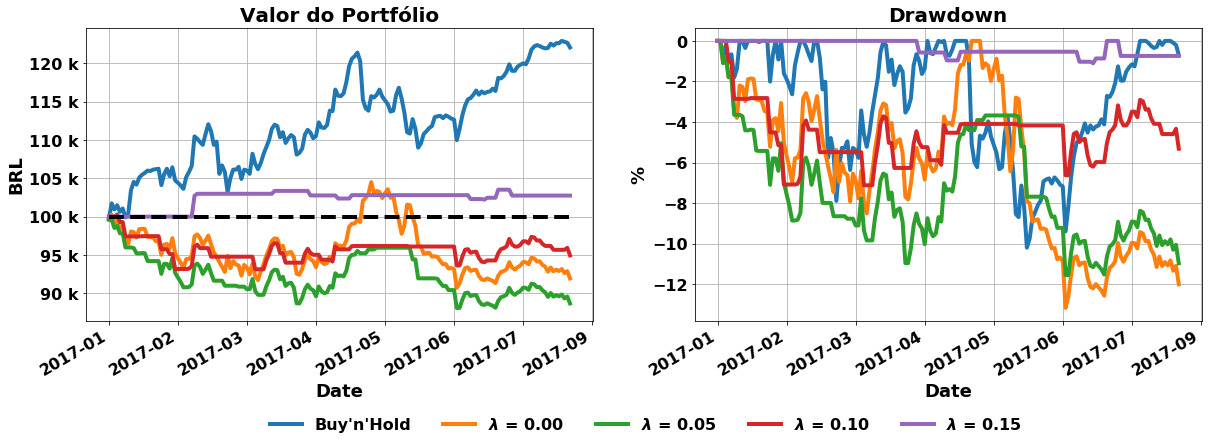

In [6]:
initialFunds = 100000
startDate = '2017'
endDate = '2017'
assetsToUse2 = [
               'ABEV3', 
               #'BRFS3', 
               #'BVMF3',
               #'CCRO3',
               #'ELET3',
               #'ITUB4', 
               #'KROT3', 
               #'LAME4', 
               #'PETR4', 
               #'SUZB5', 
               #'USIM5', 
               #'VALE5',
               #'VIVT4'
              ]

bt2.simulate(strategy = 'buy-n-hold', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2, verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
            orders = {'ABEV3': df['ABEV3_bin_predicted_SAE_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_SAE_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_SAE_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_SAE_mapminmax'],'ELET3': df['ELET3_bin_predicted_SAE_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_SAE_mapminmax'],'KROT3': df['KROT3_bin_predicted_SAE_mapminmax'],'LAME4': df['LAME4_bin_predicted_SAE_mapminmax'],'PETR4': df['PETR4_bin_predicted_SAE_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_SAE_mapminmax'],'USIM5': df['USIM5_bin_predicted_SAE_mapminmax'],'VALE5': df['VALE5_bin_predicted_SAE_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_SAE_mapminmax']},
            confidenceLimit = 0.0, simulationName = 'predicted_bin_sae_minmax_0.0', verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
            orders = {'ABEV3': df['ABEV3_bin_predicted_SAE_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_SAE_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_SAE_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_SAE_mapminmax'],'ELET3': df['ELET3_bin_predicted_SAE_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_SAE_mapminmax'],'KROT3': df['KROT3_bin_predicted_SAE_mapminmax'],'LAME4': df['LAME4_bin_predicted_SAE_mapminmax'],'PETR4': df['PETR4_bin_predicted_SAE_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_SAE_mapminmax'],'USIM5': df['USIM5_bin_predicted_SAE_mapminmax'],'VALE5': df['VALE5_bin_predicted_SAE_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_SAE_mapminmax']},
            confidenceLimit = 0.05,simulationName = 'predicted_bin_sae_minmax_0.05', verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
            orders = {'ABEV3': df['ABEV3_bin_predicted_SAE_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_SAE_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_SAE_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_SAE_mapminmax'],'ELET3': df['ELET3_bin_predicted_SAE_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_SAE_mapminmax'],'KROT3': df['KROT3_bin_predicted_SAE_mapminmax'],'LAME4': df['LAME4_bin_predicted_SAE_mapminmax'],'PETR4': df['PETR4_bin_predicted_SAE_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_SAE_mapminmax'],'USIM5': df['USIM5_bin_predicted_SAE_mapminmax'],'VALE5': df['VALE5_bin_predicted_SAE_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_SAE_mapminmax']},
            confidenceLimit = 0.1,simulationName = 'predicted_bin_sae_minmax_0.1', verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
            orders = {'ABEV3': df['ABEV3_bin_predicted_SAE_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_SAE_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_SAE_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_SAE_mapminmax'],'ELET3': df['ELET3_bin_predicted_SAE_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_SAE_mapminmax'],'KROT3': df['KROT3_bin_predicted_SAE_mapminmax'],'LAME4': df['LAME4_bin_predicted_SAE_mapminmax'],'PETR4': df['PETR4_bin_predicted_SAE_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_SAE_mapminmax'],'USIM5': df['USIM5_bin_predicted_SAE_mapminmax'],'VALE5': df['VALE5_bin_predicted_SAE_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_SAE_mapminmax']},
            confidenceLimit = 0.15,simulationName = 'predicted_bin_sae_minmax_0.15', verbose = 0)

bt2.plotSimulations(simulations = ['buy-n-hold', 'predicted_bin_sae_minmax_0.0', 'predicted_bin_sae_minmax_0.05', 'predicted_bin_sae_minmax_0.1', 'predicted_bin_sae_minmax_0.15'], 
                    names = ['Buy\'n\'Hold', r'$\lambda$ = 0.00', r'$\lambda$ = 0.05', r'$\lambda$ = 0.10', r'$\lambda$ = 0.15'], locale = 'pt',
                   legendsize = 16, linewidth = 4.0, legendPos = (-0.85 , -0.4), legendncol = 5,
                   saveImg = False, saveDir = saveFigDir, saveName = assetsToUse2[0] + '_bin_saeLim_pt')